https://m.blog.naver.com/win0k/221599051866

In [9]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 
plt.rcParams['font.size'] = 15
plt.rcParams['font.weight'] = 'bold'

## 내 데이터

In [11]:
df = pd.read_csv('/Users/siu/MP303_table.csv')

In [12]:
df

,Title,POLQ_IC50_nM_Float,docking score
0,"Compound 35 (Page No: 23, Table No: 1)",200,-7.073
1,"Compound 147 (Page No: 39, Table No: 1)",200,-6.664
2,"Compound 119 (Page No: 35, Table No: 1)",200,-6.471
3,"Compound 142 (Page No: 38, Table No: 1)",200,-6.436
4,"Compound 160 (Page No: 41, Table No: 1)",200,-6.383
...,...,...,...
169,"Compound 39 (Page No: 24, Table No: 1)",10000,-5.259
170,"Compound 36 (Page No: 23, Table No: 1)",10000,-5.231
171,"Compound 204 (Page No: 47, Table No: 1)",10000,-5.128
172,"Compound 37 (Page No: 23, Table No: 1)",10000,-4.656


In [25]:
# Y값 -> 1,0
exp_col = 'POLQ_IC50_nM_Float'
df['ClassExp'] = [1 if x <= 200 else 0 for x in df[exp_col]]

In [26]:
# 도킹 스코어 양수로
df['ValuePred'] = -df['docking score']

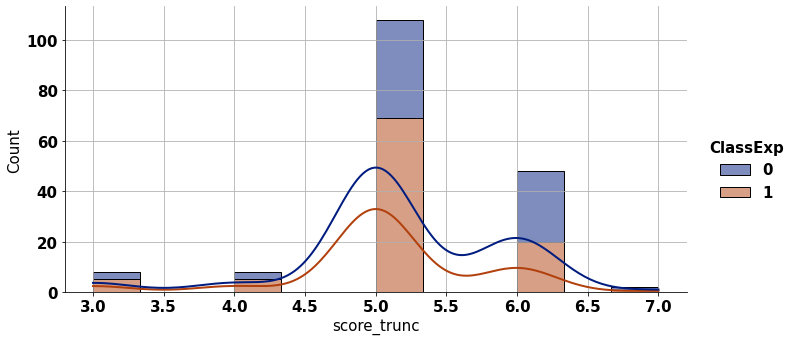

In [27]:
# draw countplot
df['score_trunc'] = np.trunc(np.array(df['ValuePred']))    # truncate score

sns.set_palette("dark")
sns.displot(df, x='score_trunc', hue='ClassExp', multiple='stack', kde=True, height=5, aspect=2)

# hue = exp value for classification by color on plot
# kde = show distribution line
# height(가로), aspect(비율) 
# https://seaborn.pydata.org/generated/seaborn.displot.html

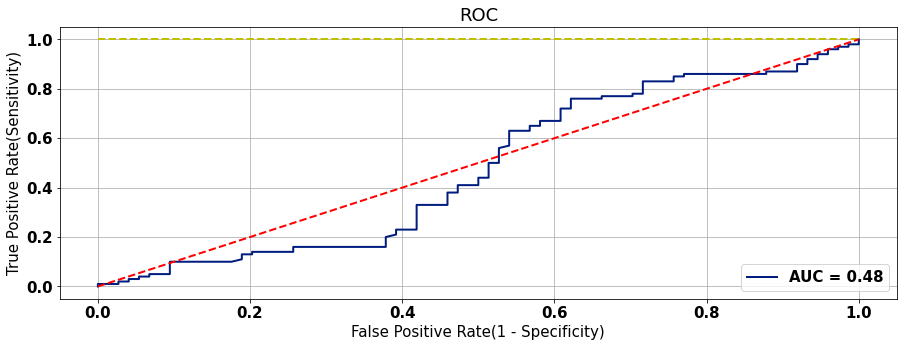

In [35]:
real = np.array(df['ClassExp'])
pred = np.array(df['ValuePred'])

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
FPR, TPR, THS = roc_curve(real, pred, pos_label=1)
AUC = auc(FPR, TPR)

plt.title('ROC')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(FPR, TPR, label='AUC = %0.2f'%AUC)   # %0.2f는 변수를 소수점 둘째자리까지 표기하겠다는 의미
plt.legend(loc = 'lower right')    # 라벨 표시 위치를 지정 

plt.plot([0,1],[1,1], 'y--')    # 노란색 라인 그림
plt.plot([0,1],[0,1], 'r--')    # 빨간색 라인 그림

plt.show()

In [36]:
AUC

0.4762837837837838

## 예제 데이터

In [3]:
score = [8.05, 9.00, 3.45, 2.32, 10.11, 5.5, 6.70, 9.01, 7.00, 6.29]
exp = [4.2, 9.5, 3.3, 10.4, 7.5, 3.5, 6.3, 9.1, 4.3, 8.3]
data = {'score':score, 'exp':exp}

df = pd.DataFrame.from_dict(data)

In [4]:
df

,score,exp
0,8.05,4.2
1,9.00,9.5
2,3.45,3.3
3,2.32,10.4
4,10.11,7.5
5,5.50,3.5
6,6.70,6.3
7,9.01,9.1
8,7.00,4.3
9,6.29,8.3


In [5]:
# Classify Exp value to 1 and 0
df['class'] = [1 if x > 7 else 0 for x in df['exp']]

# count
len_pos = len([i for i in df['class'] if i == 1])
len_neg = len([i for i in df['class'] if i == 0])

print('Positive:', len_pos, '//', 'Negative:', len_neg)

df

Positive: 5 // Negative: 5


,score,exp,class
0,8.05,4.2,0
1,9.00,9.5,1
2,3.45,3.3,0
3,2.32,10.4,1
4,10.11,7.5,1
5,5.50,3.5,0
6,6.70,6.3,0
7,9.01,9.1,1
8,7.00,4.3,0
9,6.29,8.3,1


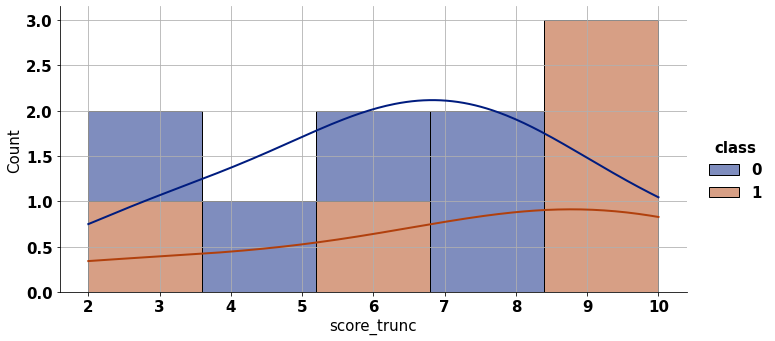

In [6]:
# draw countplot
df['score_trunc'] = np.trunc(np.array(score))    # truncate score

sns.set_palette("dark")
sns.displot(df, x='score_trunc', hue='class', multiple='stack', kde=True, height=5, aspect=2)

# hue = exp value for classification by color on plot
# kde = show distribution line
# height(가로), aspect(비율) 
# https://seaborn.pydata.org/generated/seaborn.displot.html

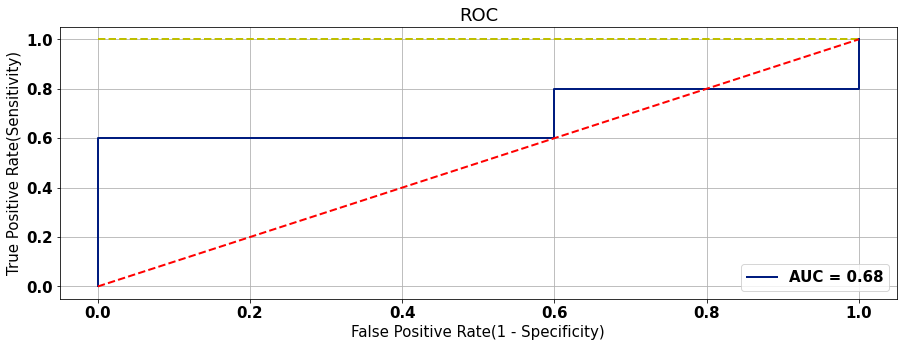

In [7]:
real = np.array(df['class'])
pred = np.array(df['score'])

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
FPR, TPR, THS = roc_curve(real, pred)
AUC = auc(FPR, TPR)

plt.title('ROC')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(FPR, TPR, label='AUC = %0.2f'%AUC)   # %0.2f는 변수를 소수점 둘째자리까지 표기하겠다는 의미
plt.legend(loc = 'lower right')    # 라벨 표시 위치를 지정 

plt.plot([0,1],[1,1], 'y--')    # 노란색 라인 그림
plt.plot([0,1],[0,1], 'r--')    # 빨간색 라인 그림

plt.show()